In [1]:
model_dir = 'runs/detect/doclaynet_base_train17'

In [2]:
src_image_file = '/app/trainer/2.png'

In [7]:
import cv2
from ultralytics import YOLO 

# Define constants
BOX_COLORS = {
    "unchecked": (242, 48, 48),
    "checked": (38, 115, 101)
}
BOX_PADDING = 2

MODEL = YOLO(f"{model_dir}/weights/best.pt") # 0: checked, 1: unchecked

image = cv2.imread(src_image_file)

# Predict on image
results = MODEL.predict(source=image, conf=0.2, iou=0.3)
boxes = results[0].boxes
BOX_COLORS = {
    "unchecked": (242, 48, 48),
    "checked": (38, 115, 101),
}
BOX_PADDING = 2

for box in boxes:
    cls_label_numeric = box.cls[0].item()
    cls = 'unchecked' if cls_label_numeric==1.0 else 'checked'
    
    start_box = (int(box.xyxy[0][0]), int(box.xyxy[0][1]))
    end_box = (int(box.xyxy[0][2]), int(box.xyxy[0][3]))
    line_thickness = round(0.002 * (image.shape[0] + image.shape[1]) / 2) + 1
    line_thickness = 2
    image = cv2.rectangle(
        img=image,
        pt1=start_box,
        pt2=end_box,
        color=BOX_COLORS[cls],
        thickness=line_thickness
    )


0: 640x480 2 checkeds, 10 uncheckeds, 7.0ms
Speed: 1.5ms preprocess, 7.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


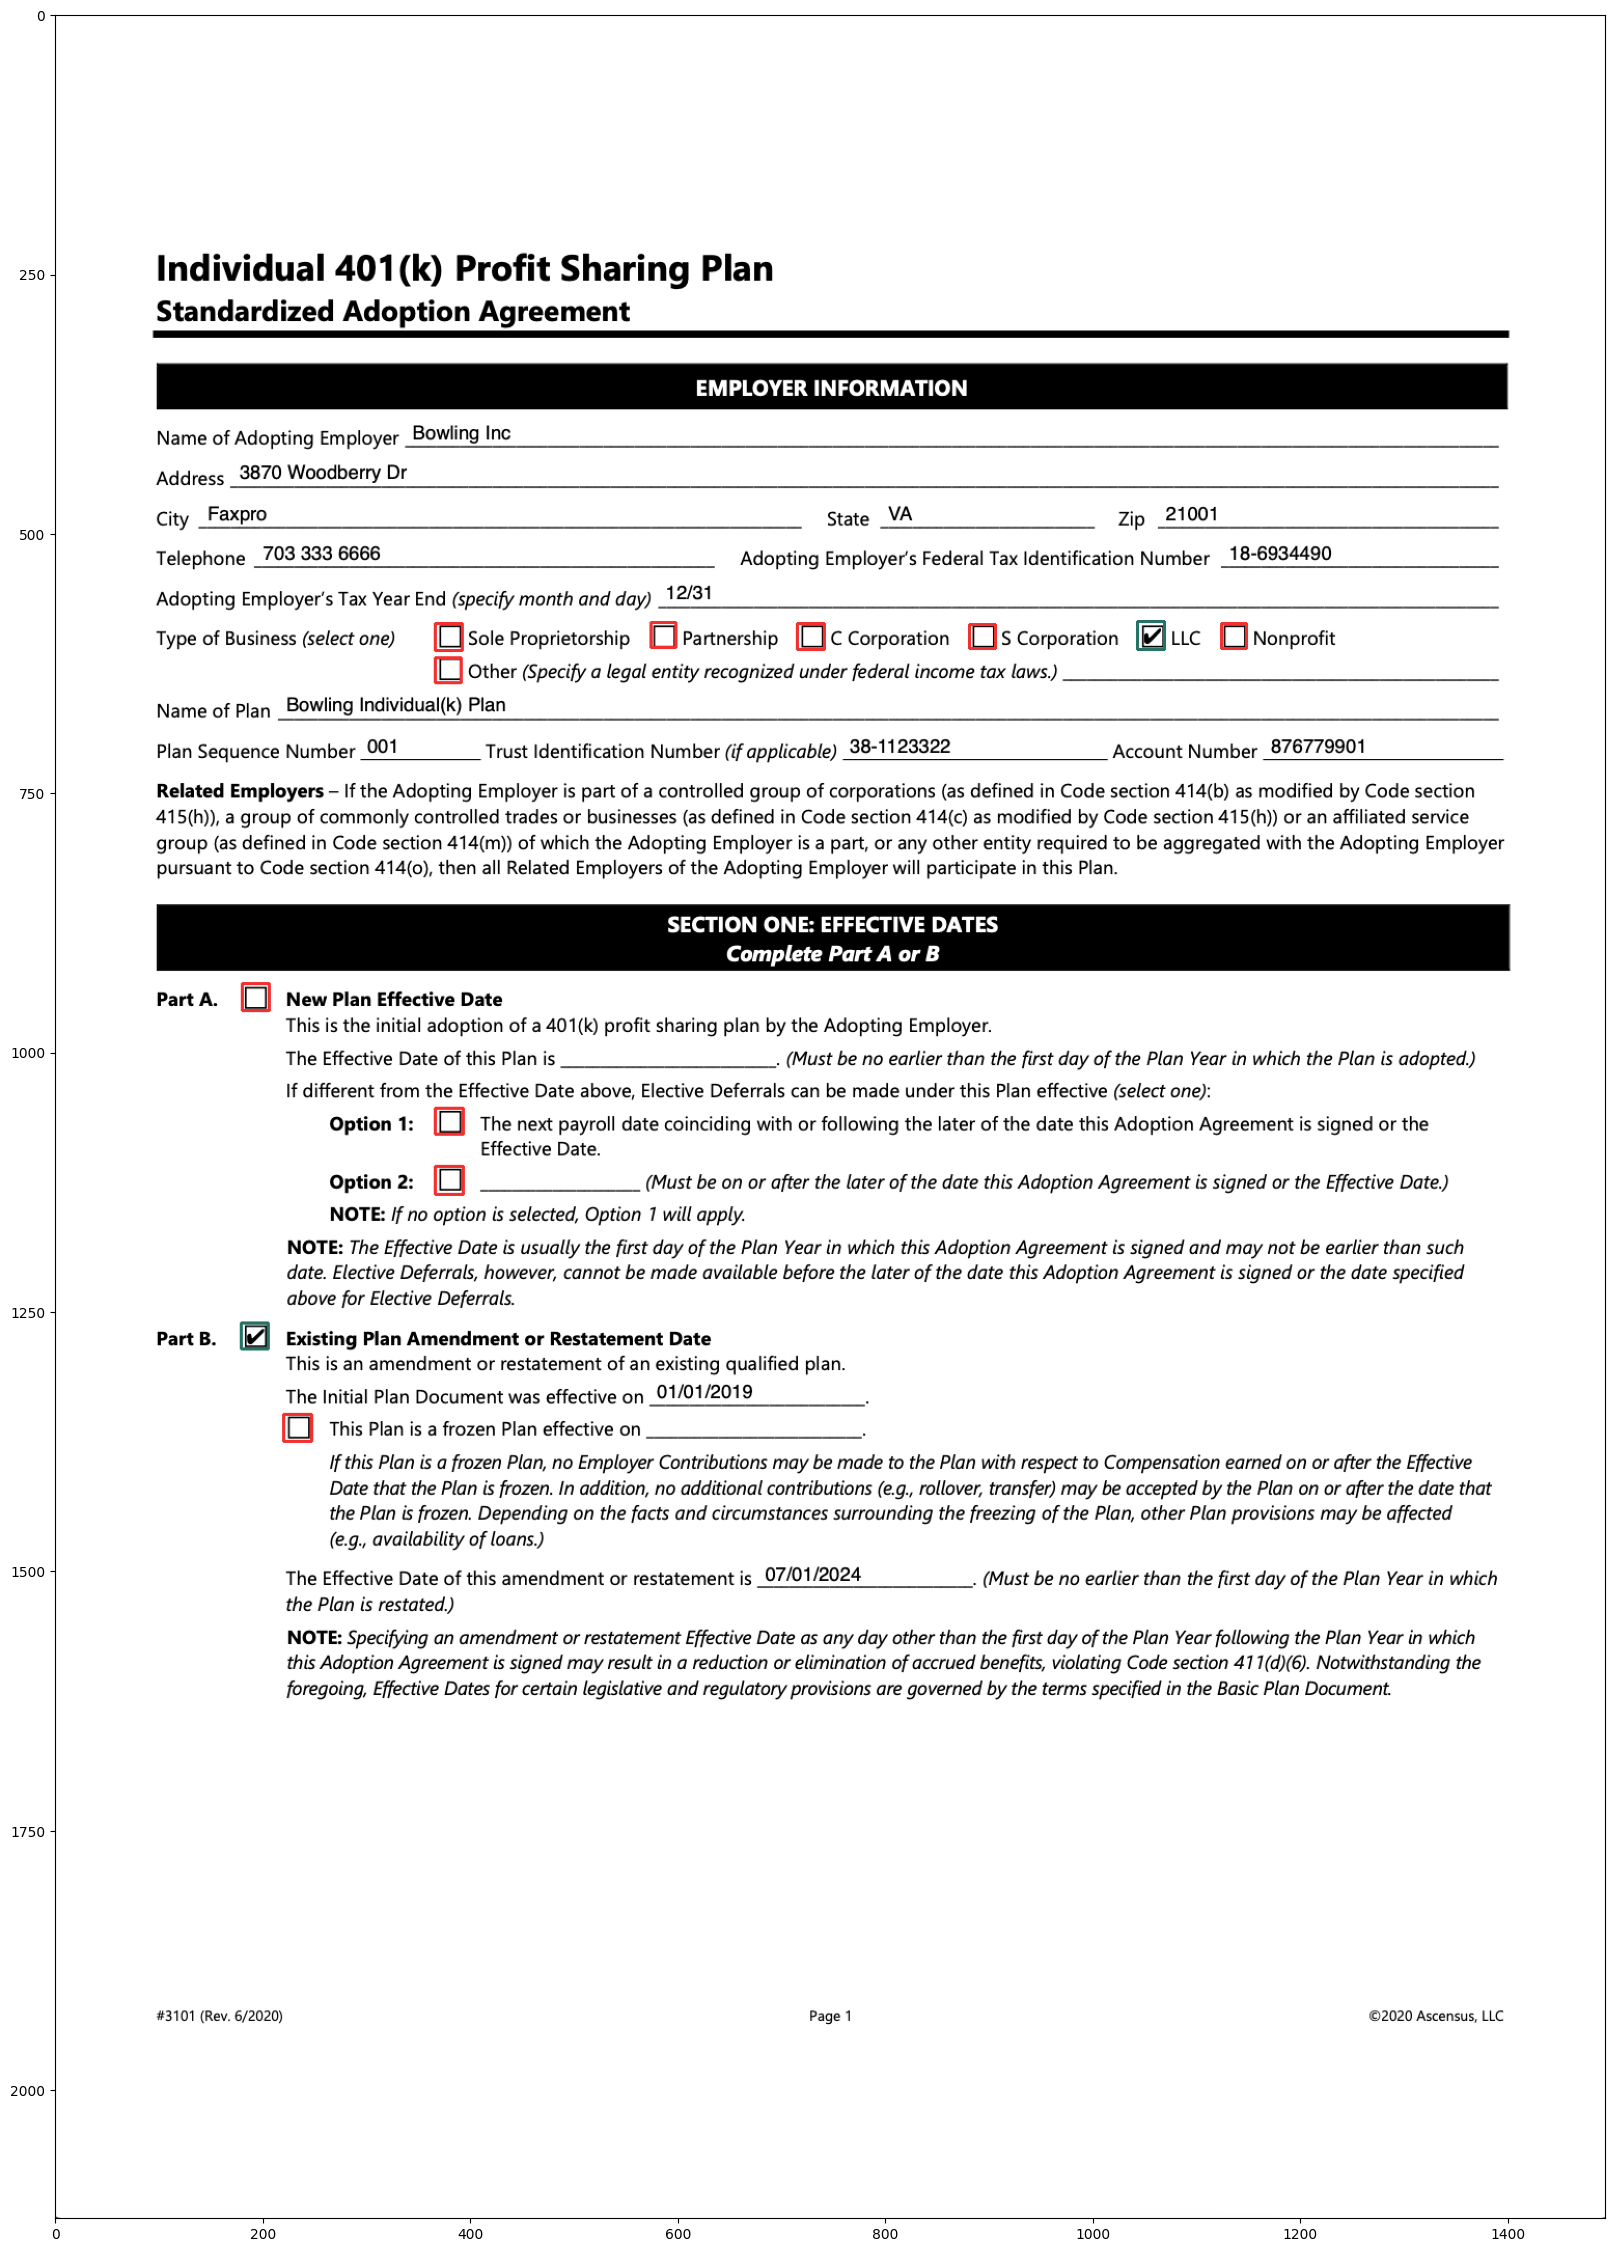

In [8]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (20, 30)
plt.imshow(image)
plt.show()